In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

#2. Load the dataset

In [2]:
obj=pd.read_csv(r"/content/Mall_Customers.csv")
obj.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. Perform Below Visualizations

# a) Univariate Analysis




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


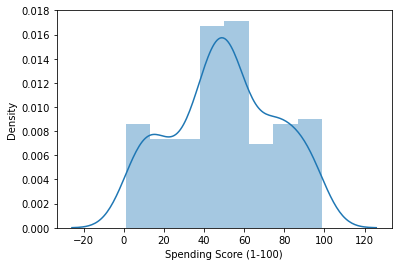

In [3]:
sns.distplot(obj['Spending Score (1-100)'])

# b) Bi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


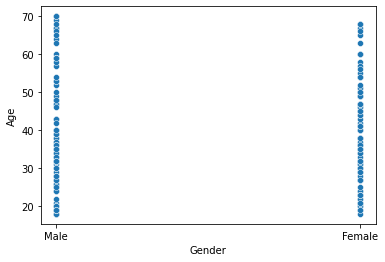

In [12]:
sns.scatterplot(obj['Gender'],obj['Age'])

# c)Multi - Variate Analysis

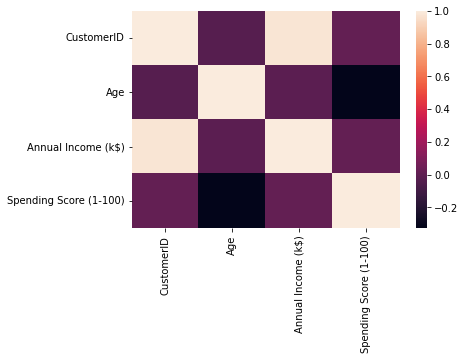

In [6]:
sns.heatmap(obj.corr())

# 4. Perform descriptive statistics on the dataset

In [8]:
obj.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 5. Check for Missing values and deal with them

In [9]:
obj.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 6. Find the outliers and replace them outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


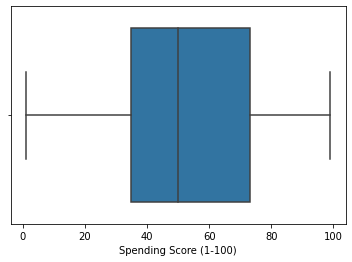

In [13]:
sns.boxplot(obj['Spending Score (1-100)'])

In [14]:
q=obj.quantile([0.90,0.75])
q

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.90,180.10,59.1,93.4,87.1
0.75,150.25,49.0,78.0,73.0


In [15]:
iqr=q.iloc[0]-q.iloc[1]
iqr

CustomerID                29.85
Age                       10.10
Annual Income (k$)        15.40
Spending Score (1-100)    14.10
dtype: float64

In [16]:
u=q.iloc[0]+(1.5*iqr)
u

CustomerID                224.875
Age                        74.250
Annual Income (k$)        116.500
Spending Score (1-100)    108.250
dtype: float64

In [17]:
l=q.iloc[1]-(1.5*iqr)
l

CustomerID                105.475
Age                        33.850
Annual Income (k$)         54.900
Spending Score (1-100)     51.850
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


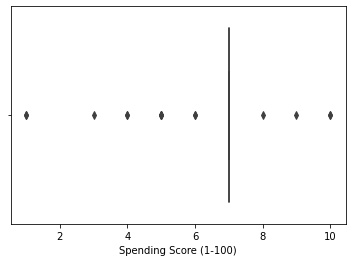

In [19]:
obj['Spending Score (1-100)']=np.where(obj['Spending Score (1-100)']>10,7,obj['Spending Score (1-100)'])
sns.boxplot(obj['Spending Score (1-100)'])

#7. Check for Categorical columns and perform encoding.

In [20]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()
obj['Gender']=le.fit_transform(obj['Gender'])
obj.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,7,7
1,2,1,21,7,7
2,3,0,20,7,6
3,4,0,23,7,7
4,5,0,31,7,7


# 8. Scaling the data

In [21]:
x=obj.drop('Age',axis=1)
y=obj['Age']
x

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,1,1,7,7
1,2,1,7,7
2,3,0,7,6
3,4,0,7,7
4,5,0,7,7
...,...,...,...,...
195,196,0,7,7
196,197,0,7,7
197,198,1,7,7
198,199,1,7,7


In [22]:
y

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
s=MinMaxScaler()
x_scale=s.fit_transform(x)
x_scale

array([[0.        , 1.        , 0.        , 0.66666667],
       [0.00502513, 1.        , 0.        , 0.66666667],
       [0.01005025, 0.        , 0.        , 0.55555556],
       [0.01507538, 0.        , 0.        , 0.66666667],
       [0.0201005 , 0.        , 0.        , 0.66666667],
       [0.02512563, 0.        , 0.        , 0.66666667],
       [0.03015075, 0.        , 0.        , 0.55555556],
       [0.03517588, 0.        , 0.        , 0.66666667],
       [0.04020101, 1.        , 0.        , 0.22222222],
       [0.04522613, 0.        , 0.        , 0.66666667],
       [0.05025126, 1.        , 0.        , 0.66666667],
       [0.05527638, 0.        , 0.        , 0.66666667],
       [0.06030151, 0.        , 0.        , 0.66666667],
       [0.06532663, 0.        , 0.        , 0.66666667],
       [0.07035176, 1.        , 0.        , 0.66666667],
       [0.07537688, 1.        , 0.        , 0.66666667],
       [0.08040201, 0.        , 0.        , 0.66666667],
       [0.08542714, 1.        ,

# 9. Perform any of the clustering algorithms

In [24]:
from sklearn.cluster import KMeans
km=KMeans()
clust=km.fit_predict(x_scale)
clust

array([4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 4, 4,
       1, 4, 1, 4, 1, 4, 1, 1, 4, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       5, 5, 2, 5, 2, 5, 5, 5, 2, 2, 5, 2, 5, 5, 2, 2, 2, 5, 5, 2, 5, 5,
       5, 5, 5, 2, 2, 5, 5, 2, 5, 5, 2, 2, 5, 5, 7, 7, 7, 5, 5, 7, 7, 7,
       7, 5, 5, 7, 5, 5, 5, 5, 5, 5, 7, 5, 5, 7, 5, 5, 7, 7, 7, 7, 7, 7,
       3, 3, 7, 3, 3, 7, 7, 3, 3, 7, 3, 3, 7, 7, 7, 3, 3, 7, 7, 7, 3, 3,
       3, 3, 0, 3, 0, 3, 3, 3, 6, 3, 6, 3, 6, 3, 3, 6, 6, 6, 6, 6, 3, 3,
       6, 6, 6, 6, 3, 3, 6, 3, 3, 6, 3, 6, 3, 3, 3, 3, 6, 3, 3, 3, 3, 6,
       6, 6], dtype=int32)

# 10. Add the cluster data with the primary dataset

In [25]:
obj.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [26]:
obj1=pd.DataFrame(x_scale,columns=['Gender','Age','Annual Income (k$)','Spending Score (1-100)'])
obj1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.0,0.666667
1,0.005025,1.0,0.0,0.666667
2,0.010050,0.0,0.0,0.555556
3,0.015075,0.0,0.0,0.666667
4,0.020101,0.0,0.0,0.666667


In [27]:
obj1['omi']=pd.Series(clust)
obj1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),omi
0,0.000000,1.0,0.0,0.666667,4
1,0.005025,1.0,0.0,0.666667,4
2,0.010050,0.0,0.0,0.555556,1
3,0.015075,0.0,0.0,0.666667,1
4,0.020101,0.0,0.0,0.666667,1


# 11. Split the data into dependent and independent variables.

In [28]:
x=obj1.iloc[:,0:4]
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.0,0.666667
1,0.005025,1.0,0.0,0.666667
2,0.010050,0.0,0.0,0.555556
3,0.015075,0.0,0.0,0.666667
4,0.020101,0.0,0.0,0.666667
...,...,...,...,...
195,0.979899,0.0,0.0,0.666667
196,0.984925,0.0,0.0,0.666667
197,0.989950,1.0,0.0,0.666667
198,0.994975,1.0,0.0,0.666667


In [29]:
y=obj1['omi']
y

0      4
1      4
2      1
3      1
4      1
      ..
195    3
196    3
197    6
198    6
199    6
Name: omi, Length: 200, dtype: int32

# 12. Split the data into training and testing

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.3,random_state=1)

# 13. Build the Model

# 14. Train the Model

In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

# 15. Test the Model

In [32]:
predict_test=lr.predict(x_test)
predict_test

array([1, 1, 1, 7, 3, 7, 7, 1, 1, 3, 7, 4, 1, 5, 7, 3, 3, 1, 3, 2, 2, 1,
       1, 5, 1, 7, 1, 1, 3, 4, 1, 3, 3, 7, 7, 5, 3, 5, 5, 7, 7, 7, 3, 4,
       1, 1, 5, 1, 7, 3, 7, 7, 3, 2, 4, 7, 3, 5, 7, 7], dtype=int32)

In [33]:
y_test

58     1
40     1
34     1
102    7
184    3
198    6
95     2
4      1
29     1
168    3
171    6
18     4
11     1
89     5
110    7
118    5
159    3
35     1
136    3
59     2
51     2
16     1
44     1
94     5
31     1
162    6
38     1
28     1
193    3
27     4
47     1
165    3
194    3
177    6
176    6
97     5
174    3
73     5
69     5
172    6
108    7
107    7
189    3
14     4
56     1
19     1
114    5
39     1
185    6
124    5
98     2
123    7
119    5
53     2
33     4
179    6
181    3
106    5
199    6
138    7
Name: omi, dtype: int32

# 16. Measure the performance using Evaluation Metrics.

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(predict_test,y_test)

0.7666666666666667